In [1]:
import sys
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib.pyplot import plot, legend

In [5]:
data = pd.read_csv('../src/data/regression/data.cube.train.100.csv')
X = data[["x"]].values
Y = data["y"].values.reshape(-1,1)

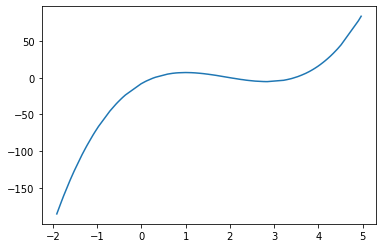

In [6]:
plot(*zip(*sorted(zip(data.x, data.y))))

In [7]:
X_train_scaler = MinMaxScaler((0,1))
Y_train_scaler = MinMaxScaler((0,1))
X_normed = X_train_scaler.fit_transform(X)
y_normed = Y_train_scaler.fit_transform(Y)

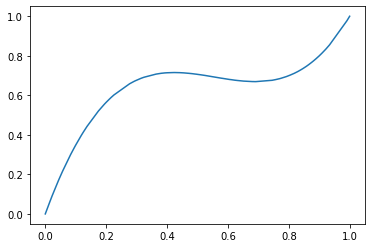

In [8]:
plot(*zip(*sorted(zip(X_normed, y_normed))))

In [9]:
#X_normed = X
#y_normed = y

In [10]:
copy_Y_normed = y_normed.copy()

In [11]:
nn2 = NeuralNetwork(seed=1, n_layers=5,
                    n_neurons_per_layer=[1, 5,  5, 5, 1], act_funcs=['relu', 'relu','relu', 'relu', 'linear'],
                    bias=True, problem='regression')

for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

history = nn2.train(X_normed.T, y_normed, 15000, 0.7, full_history=True, full_history_freq=1000)

Dense_0 1 1
Dense_1 1 5
Dense_2 5 5
Dense_3 5 5
Dense_4 5 1


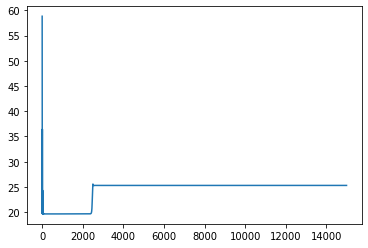

In [12]:
plot(history['metrics'])

In [13]:
y_hat = nn2.predict(X_normed.T).T

In [14]:
y_hat.shape

(100, 1)

In [15]:
len(y_hat)

100

0.41605903540279765


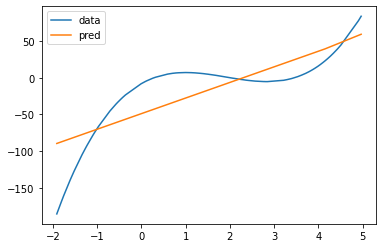

In [16]:
#y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat).reshape(-1,1)
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()
print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

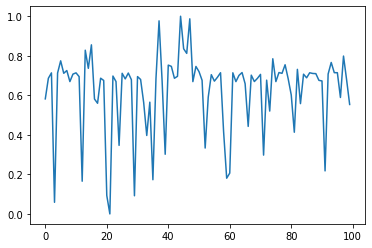

In [17]:
plot(y_normed)

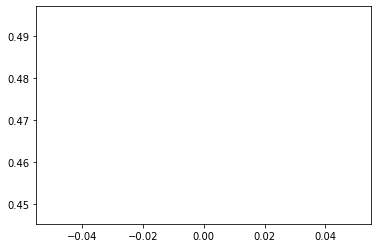

In [18]:
plot(y_hat[0])

In [19]:
grads, caches, weights, biases = history['grads'], history['caches'], history['weights'], history['biases']

In [20]:
grad, cache, weight, bias = grads[0], caches[0], weights[0], biases[0]

In [21]:
import graphviz

In [22]:
from src.visualization.visualize import ann_viz

In [23]:
grad.keys()

dict_keys(['dA_curr4', 'dA_prev4', 'dW4', 'db4', 'dA_curr3', 'dA_prev3', 'dW3', 'db3', 'dA_curr2', 'dA_prev2', 'dW2', 'db2', 'dA_curr1', 'dA_prev1', 'dW1', 'db1'])

In [24]:
grad['db3']

array([[ 0.        ],
       [ 0.        ],
       [-0.03458237],
       [-0.04163945],
       [ 0.        ]])

In [25]:
nn2.n_neurons_per_layer

[1, 5, 5, 5, 1]

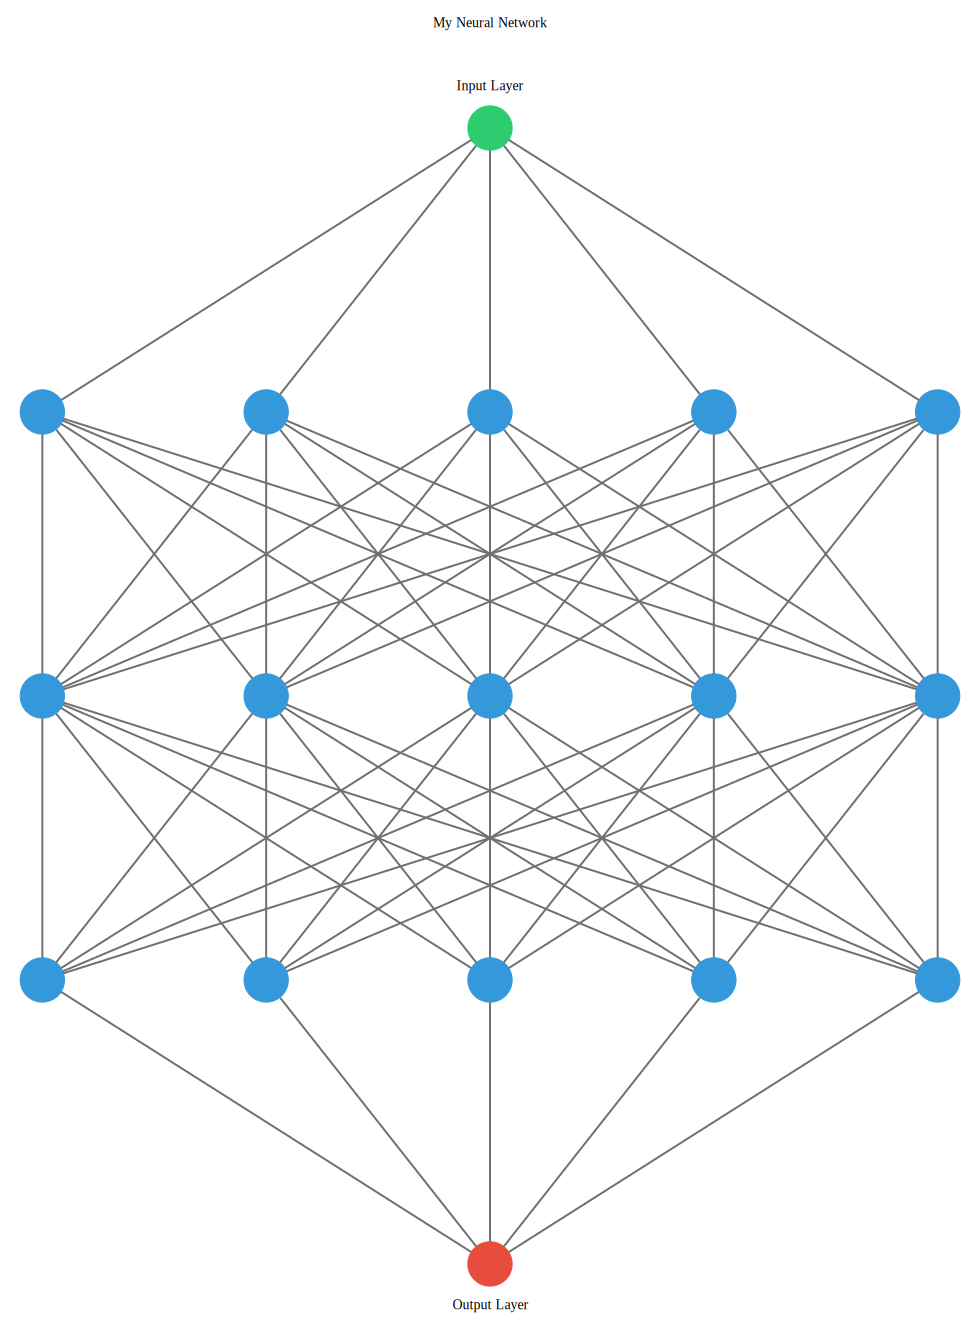

In [26]:
ann_viz(nn2, caches[-1], weights[-1], biases[-1], grads[-1], sample_id=11, format='svg', view=False)